# Выпускной проект: "Коронавирус - старт сервиса для чтения книг по подписке". Ч.3 - "Проект по SQL"

Автор - Кудинов Иван

## Описание данных

Коронавирус застал мир врасплох, изменив привычный порядок вещей. На какое-то время жители городов перестали выходить на улицу, посещать кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Моя первая задача как аналитика — проанализировать базу данных.

В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

Таблица `books` cодержит данные о книгах:
* book_id — идентификатор книги;
* author_id — идентификатор автора;
* title — название книги;
* num_pages — количество страниц;
* publication_date — дата публикации книги;
* publisher_id — идентификатор издателя.

Таблица `authors` cодержит данные об авторах:
* author_id — идентификатор автора;
* author — имя автора.

Таблица `publishers` cодержит данные об издательствах:
* publisher_id — идентификатор издательства;
* publisher — название издательства;

Таблица `ratings` cодержит данные о пользовательских оценках книг:
* rating_id — идентификатор оценки;
* book_id — идентификатор книги;
* username — имя пользователя, оставившего оценку;
* rating — оценка книги.

Таблица `reviews` cодержит данные о пользовательских обзорах:
* review_id — идентификатор обзора;
* book_id — идентификатор книги;
* username — имя автора обзора;
* text — текст обзора.

## Схема данных

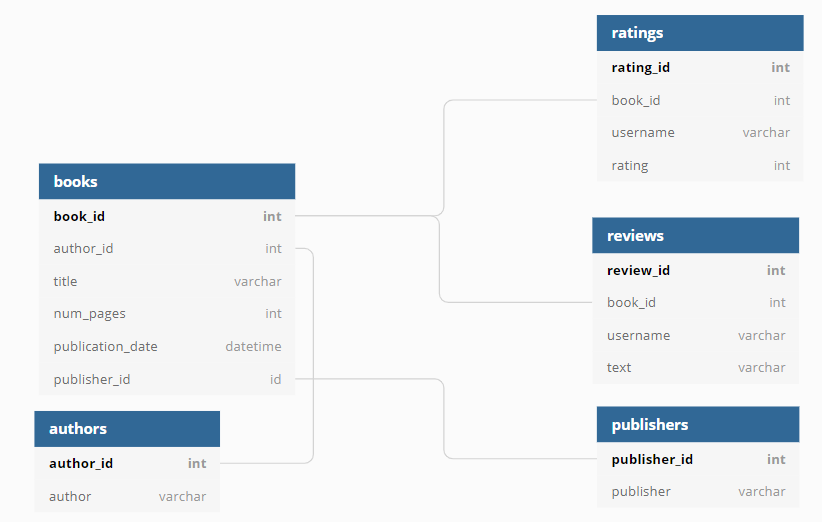

## Инструкция по выполнению проекта

### Шаг 1. Загрузка и проверка данных

1.1. Загружаю библиотеки

1.2. Выведем первые строки каждого набора данных.

1.3. Изучем общую информацию о каждом датафрейме.

1.4. Промежуточные выводы

### Шаг 2. Задания

2.1. Посчитаем, сколько книг вышло после 1 января 2000 года;

2.2. Для каждой книги посчитаем количество обзоров и среднюю оценку;

2.3. Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так исключим из анализа брошюры;

2.4. Определим автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками;

2.5. Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

### Шаг 3. Общий вывод

## Шаг 1. Загрузка и проверка данных

### 1.1. Загружаю библиотеки

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

In [3]:
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [4]:
# Широкоформатный Jupyter: расширяем границы чтобы сделать работу более комфортной:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
# Сразу напишем код для увеличения ширины столбцов, чтобы информация полностью выводилась в ячейках:
pd.options.display.max_colwidth = 1

### 1.2. Выведем первые строки каждого набора данных.

In [6]:
# Результат выдачи SQL-запроса запишу в датафрейм с помощью метода pd.read_sql_query():
# Таблица books:

query = '''SELECT * 
           FROM books
'''
data_books = pd.read_sql_query(query, con = engine)
data_books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [7]:
# Таблица authors:

query = '''SELECT * 
           FROM authors
'''
data_authors = pd.read_sql_query(query, con = engine)
data_authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [8]:
# Таблица publishers:

query = '''SELECT * 
           FROM publishers
'''
data_publishers = pd.read_sql_query(query, con = engine)
data_publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [9]:
# Таблица ratings:

query = '''SELECT * 
           FROM ratings
'''
data_ratings = pd.read_sql_query(query, con = engine)
data_ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [10]:
# Таблица reviews:

query = '''SELECT * 
           FROM reviews
'''
data_reviews = pd.read_sql_query(query, con = engine)
data_reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.


### 1.3. Изучем общую информацию о каждом датафрейме.

In [11]:
# Проверим основные данные о файле с помощью функции
def date_info(date_table):
    '''Находим общую инфрмацию об исследуемом датафрейме с помощью функций info, describe, shape, duplicated()
    и выводим количество пропусков по столбцам с помощью функции for.
    '''
    
    print('\033[1m' + 'Общая информация о датафрейме и типы данных:' + '\033[0m')
    display(date_table.info())
    print('\033[1m' + 'Описательная статистика столбцов датафрейма методом describe:' + '\033[0m')
    display(date_table.describe())
    duplicate_dict = {}
    isnull_dict = {}
    for value in date_table.columns:
        duplicate_dict[value] = date_table[value].duplicated().sum()
        isnull_dict[value] = date_table[value].isnull().sum()
        tmp_df = pd.DataFrame([isnull_dict])
    tmp_df.index = ['Пропусков в столбце']
    tmp_df = tmp_df.style.applymap(lambda x: 'color:darkred' if x > 0 else 'color:dark')
    print('\033[1m' + 'Количество пропусков по столбцам:' + '\033[0m')
    display(tmp_df)
    '''опять'''
    print('\033[1m' + 'Количество строк = ' + '\033[0m', f'{date_table.shape[0]}')
    print('\033[1m' + 'Количество столбцов =' + '\033[0m', f'{date_table.shape[1]}\n')
    result_total = print('\033[1m' + 'Явных дубликатов в датафрейме =' + '\033[0m', date_table.duplicated().sum())
    return result_total
date_info(data_books)

Общая информация о датафрейме и типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


None

Описательная статистика столбцов датафрейма методом describe:


,book_id,author_id,num_pages,publisher_id
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,320.417000,389.11100,171.270000
std,288.819436,181.620172,229.39014,99.082685
min,1.000000,1.000000,14.00000,1.000000
25%,250.750000,162.750000,249.00000,83.000000
50%,500.500000,316.500000,352.00000,177.500000
75%,750.250000,481.000000,453.00000,258.000000
max,1000.000000,636.000000,2690.00000,340.000000


Количество пропусков по столбцам:


,book_id,author_id,title,num_pages,publication_date,publisher_id
Пропусков в столбце,0,0,0,0,0,0


Количество строк =  1000
Количество столбцов = 6

Явных дубликатов в датафрейме = 0


In [12]:
date_info(data_authors)

Общая информация о датафрейме и типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


None

Описательная статистика столбцов датафрейма методом describe:


,author_id
count,636.000000
mean,318.500000
std,183.741666
min,1.000000
25%,159.750000
50%,318.500000
75%,477.250000
max,636.000000


Количество пропусков по столбцам:


,author_id,author
Пропусков в столбце,0,0


Количество строк =  636
Количество столбцов = 2

Явных дубликатов в датафрейме = 0


In [13]:
date_info(data_publishers)

Общая информация о датафрейме и типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


None

Описательная статистика столбцов датафрейма методом describe:


,publisher_id
count,340.000000
mean,170.500000
std,98.293777
min,1.000000
25%,85.750000
50%,170.500000
75%,255.250000
max,340.000000


Количество пропусков по столбцам:


,publisher_id,publisher
Пропусков в столбце,0,0


Количество строк =  340
Количество столбцов = 2

Явных дубликатов в датафрейме = 0


In [14]:
date_info(data_ratings)

Общая информация о датафрейме и типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


None

Описательная статистика столбцов датафрейма методом describe:


,rating_id,book_id,rating
count,6456.000000,6456.000000,6456.000000
mean,3228.500000,510.574195,3.928284
std,1863.831001,284.141636,0.943303
min,1.000000,1.000000,1.000000
25%,1614.750000,291.000000,3.000000
50%,3228.500000,506.000000,4.000000
75%,4842.250000,750.000000,5.000000
max,6456.000000,1000.000000,5.000000


Количество пропусков по столбцам:


,rating_id,book_id,username,rating
Пропусков в столбце,0,0,0,0


Количество строк =  6456
Количество столбцов = 4

Явных дубликатов в датафрейме = 0


In [15]:
date_info(data_reviews)

Общая информация о датафрейме и типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


None

Описательная статистика столбцов датафрейма методом describe:


,review_id,book_id
count,2793.000000,2793.000000
mean,1397.000000,504.693161
std,806.413976,288.472931
min,1.000000,1.000000
25%,699.000000,259.000000
50%,1397.000000,505.000000
75%,2095.000000,753.000000
max,2793.000000,1000.000000


Количество пропусков по столбцам:


,review_id,book_id,username,text
Пропусков в столбце,0,0,0,0


Количество строк =  2793
Количество столбцов = 4

Явных дубликатов в датафрейме = 0


### 1.4. Промежуточные выводы

Вывел общую информацию по исследуемым данным. Промежуточные выводы:
* Всего книг 1000, авторов книг 636, издательств 340, пользовательских оценок 6456, пользовательских обзоров 2793.
* Названия столбцов соответствуют правилу красивого кода;
* Пропусков и явных дубликатов во всех таблицах нет;
* Таблица books состоит из 1000 строк и 6 столбца;
* Таблица authors состоит из 636 строк и 2 столбца;
* Таблица publishers состоит из 340 строк и 2 столбца;
* Таблица ratings состоит из 6456 строк и 4 столбца;
* Таблица reviews состоит из 2793 строк и 4 столбца.

## Шаг 2. Задания

### 2.1. Посчитаем, сколько книг вышло после 1 января 2000 года

In [16]:
query = '''SELECT COUNT(DISTINCT book_id) 
            FROM books
            WHERE publication_date > '2000-01-01'
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,count
0,819


После 1 января 2000 года вышло 819 книг.

### 2.2. Для каждой книги посчитаем количество обзоров и среднюю оценку

Сначала найдем количество обзоров, затем среднюю оценку и объединим с помощью LEFT OUTER JOIN, чтобы в результат слияния вошли все записи (книги) из левой таблицы.

In [17]:
query = '''
WITH
t1 AS (SELECT book_id,
              COUNT(review_id) AS reviews_count
            FROM reviews
            GROUP BY book_id),
t2 AS (SELECT book_id,
              ROUND(AVG(rating), 2) AS average_score
            FROM ratings
            GROUP BY book_id)
SELECT b.book_id,
       b.title,
       t1.reviews_count,
       t2.average_score
FROM books AS b
LEFT JOIN t1 ON t1.book_id = b.book_id
LEFT JOIN t2 ON t2.book_id = b.book_id
'''
con=engine.connect()
data_rav = pd.io.sql.read_sql(sql=text(query), con = con)
data_rav.head()

,book_id,title,reviews_count,average_score
0,652,The Body in the Library (Miss Marple #3),2.0,4.50
1,273,Galápagos,2.0,4.50
2,51,A Tree Grows in Brooklyn,5.0,4.25
3,951,Undaunted Courage: The Pioneering First Mission to Explore America's Wild Frontier,2.0,4.00
4,839,The Prophet,4.0,4.29


In [18]:
# Выведем описательную статистику столбцов датафрейма методом describe:
data_rav.describe()

,book_id,reviews_count,average_score
count,1000.000000,994.000000,1000.000000
mean,500.500000,2.809859,3.899040
std,288.819436,1.055873,0.562388
min,1.000000,1.000000,1.500000
25%,250.750000,2.000000,3.500000
50%,500.500000,3.000000,4.000000
75%,750.250000,3.000000,4.330000
max,1000.000000,7.000000,5.000000


In [19]:
data_rav.sort_values(by='reviews_count', ascending=False).head(10)

,book_id,title,reviews_count,average_score
161,948,Twilight (Twilight #1),7.0,3.66
102,750,The Hobbit or There and Back Again,6.0,4.13
262,734,The Glass Castle,6.0,4.21
975,656,The Book Thief,6.0,4.26
41,695,The Curious Incident of the Dog in the Night-Time,6.0,4.08
245,696,The Da Vinci Code (Robert Langdon #2),6.0,3.83
510,733,The Giver (The Giver #1),6.0,3.75
65,963,Water for Elephants,6.0,3.98
747,299,Harry Potter and the Chamber of Secrets (Harry Potter #2),6.0,4.29
587,779,The Lightning Thief (Percy Jackson and the Olympians #1),6.0,4.08


In [20]:
data_rav.sort_values(by='average_score', ascending=False).head(10)

,book_id,title,reviews_count,average_score
712,672,The Cat in the Hat and Other Dr. Seuss Favorites,NaN,5.0
44,57,Act of Treason (Mitch Rapp #9),2.0,5.0
190,972,Wherever You Go There You Are: Mindfulness Meditation in Everyday Life,2.0,5.0
28,390,Light in August,2.0,5.0
810,321,Homage to Catalonia,2.0,5.0
940,213,Emily of New Moon (Emily #1),2.0,5.0
930,516,Plum Island (John Corey #1),2.0,5.0
266,967,Welcome to Temptation (Dempseys #1),2.0,5.0
610,513,Piercing the Darkness (Darkness #2),2.0,5.0
915,17,A Dirty Job (Grim Reaper #1),4.0,5.0


Для каждой книги посчитал количество обзоров и среднюю оценку.
* Максимальное количество обзоров у книги "Twilight (Twilight #1)" - 7 обзоров. У 6 книг нет обзоров, т.е. получается минимальное количество обзоров равняется 0.
* Среднее количество обзоров по всем книгам 2,81.
* Максимальный средний балл у многих книг составляет 5 баллов. Минимальный 1,5 балла.
* Средний балл по всем книгам составляет 3,90.

### 2.3. Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так исключим из анализа брошюры

In [21]:
query = '''SELECT p.publisher,
                COUNT(b.title) AS books_count
            FROM publishers AS p
            LEFT JOIN books AS b ON b.publisher_id = p.publisher_id
            WHERE b.num_pages > 50
            GROUP BY p.publisher
            ORDER BY books_count DESC;
'''
con=engine.connect()
data_pub = pd.io.sql.read_sql(sql=text(query), con = con)
data_pub.head()

,publisher,books_count
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19


In [22]:
# Выведем описательную статистику столбцов датафрейма методом describe:
data_pub.describe()

,books_count
count,334.000000
mean,2.970060
std,4.377015
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,42.000000


Больше всего книг выпустило издательство "Penguin Books" - 42 книги, на втором месте "Vintage" - 31 книга, на третьем "Grand Central Publishing" - 25 книг.

Всего издательств 334.

В среднем каждое издательство выпустило по 2,97 книги.

### 2.4. Определим автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками

Сначала найдем средний рейтинг книг ratings, затем объединим с таблицей books и выведем c объединением по авторам таблицы authors получившиеся рейтинги

In [23]:
query = '''
WITH
t1 AS (SELECT book_id,
              AVG(rating) AS average_rating_book
        FROM ratings
        GROUP BY book_id
        HAVING COUNT(rating_id) >= 50),
        
t2 AS (SELECT b.author_id,
              AVG(t1.average_rating_book) AS average_rating
        FROM books AS b
        LEFT JOIN t1 ON t1.book_id = b.book_id
        GROUP BY b.author_id)

SELECT a.author,
       ROUND(t2.average_rating, 2)
FROM authors AS a
LEFT JOIN t2 ON a.author_id = t2.author_id
WHERE t2.average_rating IS NOT NULL
ORDER BY t2.average_rating DESC
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author,round
0,J.K. Rowling/Mary GrandPré,4.28
1,Markus Zusak/Cao Xuân Việt Khương,4.26
2,J.R.R. Tolkien,4.26
3,Louisa May Alcott,4.19
4,Rick Riordan,4.08
5,William Golding,3.90
6,J.D. Salinger,3.83
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.79
8,William Shakespeare/Paul Werstine/Barbara A. Mowat,3.79
9,Dan Brown,3.75


Автор с самой высокой средней оценкой книг "J.K. Rowling/Mary GrandPré" - 4,28.

### 2.5. Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок

Сначала найдем пользователей, которые поставили больше 48 оценок, затем найдем количество обзоров пользователей при условии, что они поставили больше 48 оценок. Выведм среднее количество обзоров.

In [24]:
query = '''
WITH
t1 AS (SELECT username,
              COUNT(rating_id) AS rating_count
        FROM ratings
        GROUP BY username
        HAVING COUNT(rating_id) > 48),
        
t2 AS (SELECT username,
              COUNT(review_id) AS review_count
        FROM reviews
        WHERE username IN (SELECT username
                            FROM t1)
        GROUP BY username)

SELECT ROUND(AVG(t2.review_count), 2) AS average_review
FROM t2
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,average_review
0,24.0


Среднее количество обзоров пользователей, которые поставили больше 48 оценок равянется 24.

## Шаг 3. Общий вывод

`Итоговый вывод.` 

Люди продолжают читать книги! И это здорово. При выборе книги для чтения очень помогают отзывы и пользователи их достаточно активно оставляют. Рекомендация для сервиса для чтения книг по подписке - это развитие и внедрение системы поощрений за отзыв ,а также создание и поддержание чата по обсуждению как каждой книги, так и литературного направления, что позволит повысить интерес к сервису.

Результаты решения поставленных задач:

* после 1 января 2000 года вышло 819 книг.
* Для каждой книги посчитал количество обзоров и среднюю оценку.
    * Максимальное количество обзоров у книги "Twilight (Twilight #1)" - 7 обзоров. У 6 книг нет обзоров, т.е. получается минимальное количество обзоров равняется 0.
    * Среднее количество обзоров по всем книгам 2,81.
    * Максимальный средний балл у многих книг составляет 5 баллов. Минимальный 1,5 балла.
    * Средний балл по всем книгам составляет 3,90.
* Больше всего книг выпустило издательство "Penguin Books" - 42 книги, на втором месте "Vintage" - 31 книга, на третьем "Grand Central Publishing" - 25 книг.
* Всего издательств 334.
* В среднем каждое издательство выпустило по 2,97 книги.
* Автор с самой высокой средней оценкой книг "J.K. Rowling/Mary GrandPré" - 4,28.
* Среднее количество обзоров пользователей, которые поставили больше 48 оценок равянется 24.

Перед решением задач, проверил иходные данные:

* Всего книг 1000, авторов книг 636, издательств 340, пользовательских оценок 6456, пользовательских обзоров 2793.
* Названия столбцов соответствуют правилу красивого кода;
* Пропусков и явных дубликатов во всех таблицах нет;
* Таблица books состоит из 1000 строк и 6 столбца;
* Таблица authors состоит из 636 строк и 2 столбца;
* Таблица publishers состоит из 340 строк и 2 столбца;
* Таблица ratings состоит из 6456 строк и 4 столбца;
* Таблица reviews состоит из 2793 строк и 4 столбца.